In [176]:
import geopandas as gpd
import geoplot

import pandas as pd
from shapely.geometry import Point, Polygon
from geovoronoi import voronoi_regions_from_coords

import matplotlib.pyplot as plt
import numpy as np
import os
import datetime
import sys

In [177]:
weather_data_path = os.path.join('./data','nyc','weather','request_results.csv')
weather_data = pd.read_csv(weather_data_path)

In [178]:
weather_data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,DAPR,MDPR,PGTM,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
0,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31583,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-27,1.1,NaN,NaN,1334.0,...,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31584,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-28,1.3,NaN,NaN,1215.0,...,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31585,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-29,3.7,NaN,NaN,1039.0,...,16.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31586,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-30,1.5,NaN,NaN,1455.0,...,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
weather_data['DATE'] = pd.to_datetime(weather_data['DATE'])

In [180]:
stations = weather_data.drop_duplicates(keep='first', subset='STATION')

In [181]:
stations_geo = gpd.GeoDataFrame(
    stations, geometry=gpd.points_from_xy(stations.LONGITUDE, stations.LATITUDE))

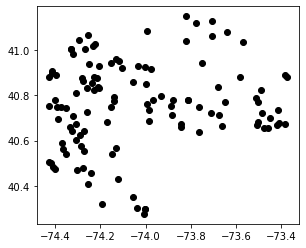

In [182]:
stations_geo.plot(color='black')
plt.show()

In [183]:
## For reference, I want to plot these on top of the council regions
council_footprints = gpd.read_file('./data/nyc/footprints/council_districts.geojson')

In [184]:
boroughs = gpd.read_file(
    geoplot.datasets.get_path('nyc_boroughs')
)

In [185]:
boroughs

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330385.03697,1.623853e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,4,Queens,861038.47930,3.049947e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,3,Brooklyn,726568.94634,1.959432e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,1,Manhattan,358532.95642,6.364422e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2,Bronx,464517.89055,1.186804e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


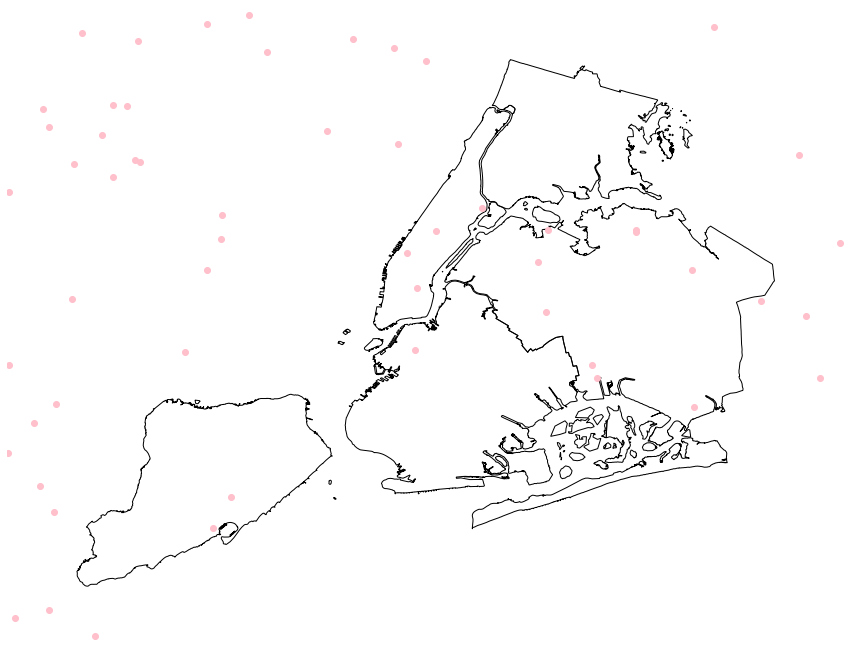

In [186]:
ax = geoplot.polyplot(boroughs, figsize=(15,15))
stations_geo.plot(color='pink', ax=ax)
plt.show()


In [187]:
np.floor(min(stations['LATITUDE']))

40.0

In [188]:
# I want some sort of baseline shape to slice into voronoi
min_lat = min(stations['LATITUDE'])
max_lat = max(stations['LATITUDE'])
min_lon = min(stations['LONGITUDE'])
max_lon = max(stations['LONGITUDE'])

weather_service_area = Polygon([[min_lon, min_lat],[min_lon,max_lat],[max_lon,max_lat],[max_lon, min_lat]])
weather_service_area = weather_service_area.buffer(0.02)
weather_service_geodf = gpd.GeoSeries(weather_service_area)

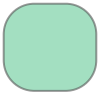

In [189]:
weather_service_area.buffer(1)

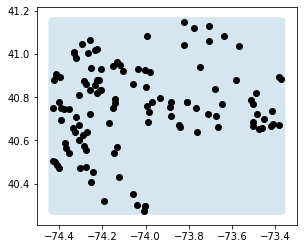

In [190]:
ax = weather_service_geodf.plot(alpha=0.18)
stations_geo.plot(color='black', ax=ax)
plt.show()

In [191]:
coords = np.array(list(zip(stations['LONGITUDE'],stations['LATITUDE'])))
coords[:4]

array([[-74.39635 ,  40.89174 ],
       [-74.42978 ,  40.50542 ],
       [-74.00151 ,  40.296952],
       [-74.37212 ,  40.58884 ]])

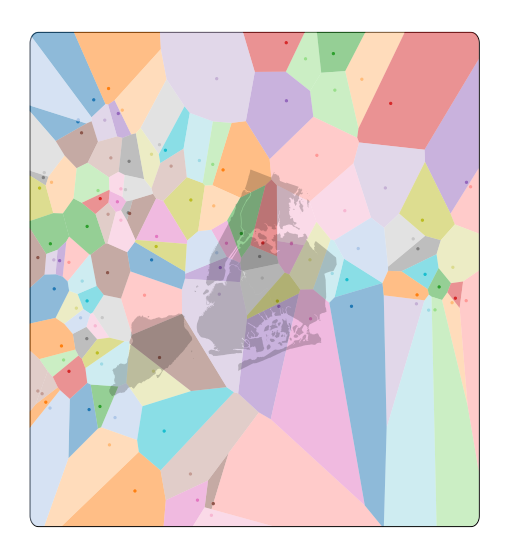

In [192]:
region_polys, region_pts = voronoi_regions_from_coords(coords, weather_service_area)

from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area

fig, ax = subplot_for_map(figsize=(10,10))
plot_voronoi_polys_with_points_in_area(ax, weather_service_area, region_polys, coords, region_pts)

boroughs.plot(ax=ax, alpha=0.2, color='black')
plt.show()

In [193]:
stations_geo = stations_geo.reset_index()
stations_geo

,index,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,DAPR,MDPR,...,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11,geometry
0,0,USC00280907,"BOONTON 1 SE, NJ US",40.891740,-74.396350,85.3,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.39635 40.89174)
1,364,US1NJMD0086,"HIGHLAND PARK 0.4 N, NJ US",40.505420,-74.429780,14.9,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.42978 40.50542)
2,719,US1NJMN0048,"LONG BRANCH 0.5 W, NJ US",40.296952,-74.001510,7.9,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.00151 40.29695)
3,1085,US1NJMD0088,"METUCHEN 3.3 N, NJ US",40.588840,-74.372120,27.4,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.37212 40.58884)
4,1418,US1NJPS0040,"POMPTON LAKES 1.0 ENE, NJ US",41.006785,-74.266384,89.0,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.26638 41.00679)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,30422,US1NJUN0003,"LINDEN 2.2 NW, NJ US",40.641210,-74.272595,19.8,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.27259 40.64121)
113,30743,US1NYNS0016,"MASSAPEQUA 0.9 SSW, NY US",40.655156,-73.475584,2.4,2020-03-13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.47558 40.65516)
114,30786,US1NYNS0018,"HICKSVILLE 1.3 ENE, NY US",40.768654,-73.501701,45.7,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.50170 40.76865)
115,31130,US1NYWC0019,"ELMSFORD 0.8 SSW, NY US",41.042666,-73.822799,90.5,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.82280 41.04267)


In [194]:
stations_geo['coverage_zone'] = gpd.geopandas.GeoSeries(region_polys)

<AxesSubplot:>

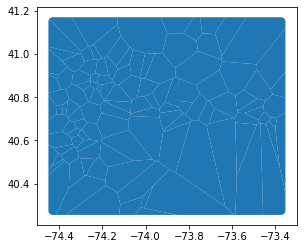

In [195]:
stations_geo.coverage_zone.plot()

In [196]:
pd.merge(weather_data, stations_geo, on="STATION", how="left")

,STATION,NAME_x,LATITUDE_x,LONGITUDE_x,ELEVATION_x,DATE_x,AWND_x,DAPR_x,MDPR_x,PGTM_x,...,WT02_y,WT03_y,WT04_y,WT05_y,WT06_y,WT08_y,WT09_y,WT11_y,geometry,coverage_zone
0,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.39635 40.89174),"POLYGON ((-74.38615 40.96816, -74.44978 41.023..."
1,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.39635 40.89174),"POLYGON ((-74.38615 40.96816, -74.44978 41.023..."
2,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.39635 40.89174),"POLYGON ((-74.38615 40.96816, -74.44978 41.023..."
3,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.39635 40.89174),"POLYGON ((-74.38615 40.96816, -74.44978 41.023..."
4,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.39635 40.89174),"POLYGON ((-74.38615 40.96816, -74.44978 41.023..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31583,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-27,1.1,NaN,NaN,1334.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.28284 40.87645),"POLYGON ((-74.19114 40.78460, -74.19301 40.781..."
31584,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-28,1.3,NaN,NaN,1215.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.28284 40.87645),"POLYGON ((-74.19114 40.78460, -74.19301 40.781..."
31585,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-29,3.7,NaN,NaN,1039.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.28284 40.87645),"POLYGON ((-74.19114 40.78460, -74.19301 40.781..."
31586,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-30,1.5,NaN,NaN,1455.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.28284 40.87645),"POLYGON ((-74.19114 40.78460, -74.19301 40.781..."


In [197]:
weather_data.isnull()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,DAPR,MDPR,PGTM,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
0,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31583,False,False,False,False,False,False,False,True,True,False,...,False,True,True,True,True,True,True,True,True,True
31584,False,False,False,False,False,False,False,True,True,False,...,False,True,True,True,True,True,True,True,True,True
31585,False,False,False,False,False,False,False,True,True,False,...,False,True,True,True,True,True,True,True,True,True
31586,False,False,False,False,False,False,False,True,True,False,...,False,True,True,True,True,True,True,True,True,True


In [198]:
percent_missing = weather_data.isnull().sum() * 100 / len(weather_data)
percent_missing


STATION        0.000000
NAME           0.000000
LATITUDE       0.000000
LONGITUDE      0.000000
ELEVATION      0.000000
DATE           0.000000
AWND          90.854122
DAPR          99.056604
MDPR          99.066101
PGTM          95.365329
PRCP           1.275801
SNOW          52.500950
SNWD          78.083449
TAVG          96.523996
TMAX          83.829302
TMIN          83.803976
TOBS          93.323414
TSUN         100.000000
WDF2          90.847790
WDF5          90.879448
WESD          93.690642
WESF          93.313917
WSF2          90.847790
WSF5          90.879448
WT01          97.245790
WT02          99.791060
WT03          99.335191
WT04          99.908193
WT05          99.987337
WT06          99.990503
WT08          99.430163
WT09          99.981005
WT11          99.936685
dtype: float64

In [199]:
weather_data['month'] = weather_data['DATE'].dt.month
weather_data['year'] = weather_data['DATE'].dt.year

In [200]:
weather_data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,DAPR,MDPR,PGTM,...,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11,month,year
0,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
1,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
2,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
3,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
4,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31583,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-27,1.1,NaN,NaN,1334.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2020
31584,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-28,1.3,NaN,NaN,1215.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2020
31585,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-29,3.7,NaN,NaN,1039.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2020
31586,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-30,1.5,NaN,NaN,1455.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2020


In [201]:
# pretty gross but need to handle these column names
nan_terms = [ 'WT0'+str(x) for x in np.array(range(9))+1 if x != 7 ]
nan_terms

['WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT08', 'WT09']

In [202]:
# so all of these terms were reported as booleans if the phenomena exists
for term in nan_terms:
    weather_data[term] = weather_data[term].notna().astype(int)

In [203]:
weather_data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,DAPR,MDPR,PGTM,...,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11,month,year
0,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-01,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,NaN,1,2020
1,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-02,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,NaN,1,2020
2,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-03,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,NaN,1,2020
3,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-04,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,NaN,1,2020
4,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-05,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,NaN,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31583,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-27,1.1,NaN,NaN,1334.0,...,0,0,0,0,0,0,0,NaN,12,2020
31584,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-28,1.3,NaN,NaN,1215.0,...,0,0,0,0,0,0,0,NaN,12,2020
31585,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-29,3.7,NaN,NaN,1039.0,...,0,0,0,0,0,0,0,NaN,12,2020
31586,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-30,1.5,NaN,NaN,1455.0,...,0,0,0,0,0,0,0,NaN,12,2020


In [204]:
# let's just try and keep the average termperature, which seems to have the best 
weather_minmax = weather_data.dropna(subset=['TMAX','TMIN'])

In [205]:
weather_data_monthly = weather_minmax.groupby(['STATION','year','month']).agg(lambda x: x.mean(skipna=True)).reset_index()

In [206]:
weather_data_monthly

,STATION,year,month,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,DAPR,MDPR,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
0,USC00280907,2020,1,40.89174,-74.39635,85.3,2020-01-16 00:00:00.000000000,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN
1,USC00280907,2020,2,40.89174,-74.39635,85.3,2020-02-15 00:00:00.000000000,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN
2,USC00280907,2020,3,40.89174,-74.39635,85.3,2020-03-15 19:12:00.000000000,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN
3,USC00280907,2020,4,40.89174,-74.39635,85.3,2020-04-15 01:42:51.428571392,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN
4,USC00280907,2020,5,40.89174,-74.39635,85.3,2020-05-16 00:00:00.000000000,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,USW00094789,2020,8,40.63915,-73.76390,2.7,2020-08-16 00:00:00.000000000,4.422581,NaN,NaN,...,12.229032,0.483871,0.032258,0.354839,0.000000,0.0,0.0,0.258065,0.000000,NaN
164,USW00094789,2020,9,40.63915,-73.76390,2.7,2020-09-15 12:00:00.000000000,4.413333,NaN,NaN,...,11.429630,0.366667,0.000000,0.033333,0.000000,0.0,0.0,0.066667,0.000000,NaN
165,USW00094789,2020,10,40.63915,-73.76390,2.7,2020-10-16 00:00:00.000000000,4.429032,NaN,NaN,...,10.716129,0.483871,0.161290,0.000000,0.000000,0.0,0.0,0.064516,0.000000,NaN
166,USW00094789,2020,11,40.63915,-73.76390,2.7,2020-11-15 12:00:00.000000000,5.193333,NaN,NaN,...,13.086667,0.466667,0.066667,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN


In [207]:
weather_data_monthly_geo = pd.merge(weather_data_monthly, stations_geo, on="STATION", how="left")

In [208]:
stations_geo

,index,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,DAPR,MDPR,...,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11,geometry,coverage_zone
0,0,USC00280907,"BOONTON 1 SE, NJ US",40.891740,-74.396350,85.3,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.39635 40.89174),"POLYGON ((-74.38615 40.96816, -74.44978 41.023..."
1,364,US1NJMD0086,"HIGHLAND PARK 0.4 N, NJ US",40.505420,-74.429780,14.9,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.42978 40.50542),"POLYGON ((-74.21377 40.52028, -74.17437 40.477..."
2,719,US1NJMN0048,"LONG BRANCH 0.5 W, NJ US",40.296952,-74.001510,7.9,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.00151 40.29695),"POLYGON ((-74.37133 40.25537, -74.18320 40.392..."
3,1085,US1NJMD0088,"METUCHEN 3.3 N, NJ US",40.588840,-74.372120,27.4,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.37212 40.58884),"POLYGON ((-74.41412 40.25537, -74.35508 40.381..."
4,1418,US1NJPS0040,"POMPTON LAKES 1.0 ENE, NJ US",41.006785,-74.266384,89.0,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.26638 41.00679),"POLYGON ((-74.30085 40.51739, -74.23323 40.513..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,30422,US1NJUN0003,"LINDEN 2.2 NW, NJ US",40.641210,-74.272595,19.8,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.27259 40.64121),"POLYGON ((-74.19052 40.78526, -74.06608 40.777..."
113,30743,US1NYNS0016,"MASSAPEQUA 0.9 SSW, NY US",40.655156,-73.475584,2.4,2020-03-13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.47558 40.65516),"POLYGON ((-74.19114 40.78460, -74.19301 40.781..."
114,30786,US1NYNS0018,"HICKSVILLE 1.3 ENE, NY US",40.768654,-73.501701,45.7,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.50170 40.76865),"POLYGON ((-74.19822 40.85900, -74.21384 40.856..."
115,31130,US1NYWC0019,"ELMSFORD 0.8 SSW, NY US",41.042666,-73.822799,90.5,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.82280 41.04267),"POLYGON ((-74.14855 40.87044, -74.15237 40.880..."


In [209]:
weather_data_monthly_geo = weather_data_monthly_geo.dropna(subset=['TMAX_x','TMIN_x'])

In [210]:
weather_data_monthly_geo_servicearea = weather_data_monthly_geo.drop_duplicates(subset='STATION')

<AxesSubplot:>

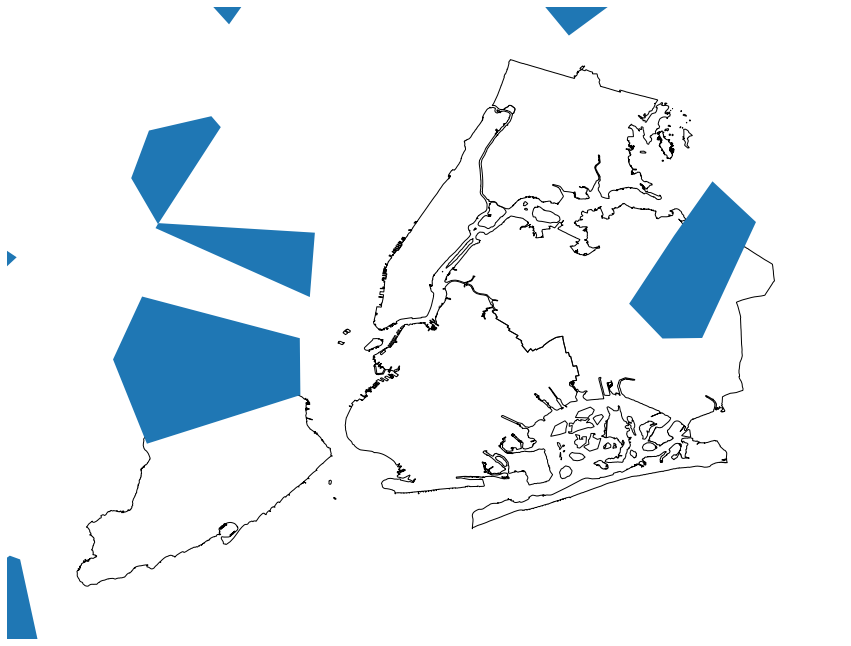

In [211]:
ax = geoplot.polyplot(boroughs, figsize=(15,15))
gpd.GeoSeries(weather_data_monthly_geo_servicearea.coverage_zone).plot(ax=ax)

In [212]:
list(weather_data_monthly_geo_servicearea['STATION'])

['USC00280907',
 'USC00281335',
 'USC00283704',
 'USC00284987',
 'USC00301309',
 'USC00308577',
 'USW00014732',
 'USW00014734',
 'USW00054743',
 'USW00054787',
 'USW00094728',
 'USW00094741',
 'USW00094745',
 'USW00094789']

In [217]:
# well, that kind of sucks, the weather data isn't good.
# so I'm going to filter for the stations which give reasonable data and repeat the
# voronoi diagram with them

# here's the stations which gave decent data
weather_data_monthly_geo_servicearea['NAME']

0                              BOONTON 1 SE, NJ US
12                              CANOE BROOK, NJ US
24                                 HARRISON, NJ US
36                     LONG BRANCH OAKHURST, NJ US
48                               CENTERPORT, NY US
60                                  SYOSSET, NY US
72                        LAGUARDIA AIRPORT, NY US
84     NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US
96                CALDWELL ESSEX CO AIRPORT, NJ US
108            FARMINGDALE REPUBLIC AIRPORT, NY US
120                    NY CITY CENTRAL PARK, NY US
132                       TETERBORO AIRPORT, NJ US
144                  WESTCHESTER CO AIRPORT, NY US
156               JFK INTERNATIONAL AIRPORT, NY US
Name: NAME, dtype: object

In [227]:
good_coords = np.array(list(zip(weather_data_monthly_geo_servicearea['LONGITUDE_x'], weather_data_monthly_geo_servicearea['LATITUDE_x'])))
good_coords

array([[-74.39635,  40.89174],
       [-74.3539 ,  40.7436 ],
       [-74.152  ,  40.7481 ],
       [-74.00153,  40.29696],
       [-73.37309,  40.88345],
       [-73.4908 ,  40.8216 ],
       [-73.88027,  40.77945],
       [-74.16927,  40.68275],
       [-74.28284,  40.87645],
       [-73.41637,  40.73443],
       [-73.96925,  40.77898],
       [-74.05616,  40.85898],
       [-73.70454,  41.06236],
       [-73.7639 ,  40.63915]])

In [230]:
## well all is not lost, we still at least have this reasonable temperature data for these 
## regions, which have decent reporting.

## and it seems like all of the data points will fall within one of four buckets, which is nice

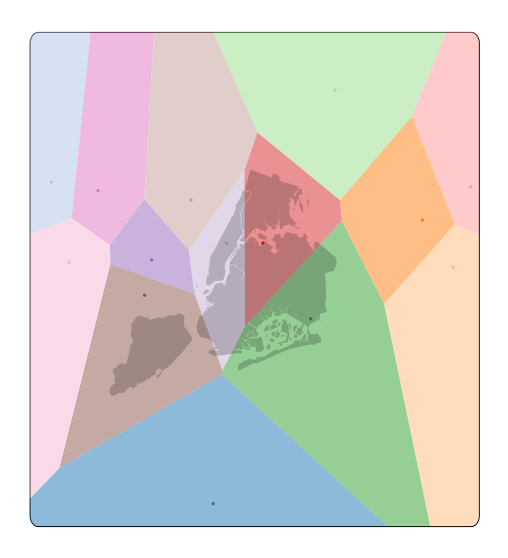

In [228]:
good_region_polys, good_region_pts = voronoi_regions_from_coords(good_coords, weather_service_area)

from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area

fig, ax = subplot_for_map(figsize=(10,10))
plot_voronoi_polys_with_points_in_area(ax, weather_service_area, good_region_polys, good_coords, good_region_pts)

boroughs.plot(ax=ax, alpha=0.2, color='black')
plt.show()

In [239]:
good_monthly_weather = weather_data_monthly_geo_servicearea.reset_index()

In [244]:
good_monthly_weather_subset = good_monthly_weather.loc[:,['STATION','geometry','coverage_zone']]

In [237]:
good_monthly_weather['coverage_zone'] = gpd.geopandas.GeoSeries(good_region_polys)

In [245]:
good_monthly_weather_subset

,STATION,geometry,coverage_zone
0,USC00280907,POINT (-74.39635 40.89174),"POLYGON ((-74.38615 40.96816, -74.44978 41.023..."
1,USC00281335,POINT (-74.35390 40.74360),"POLYGON ((-73.45128 40.73299, -73.45621 40.758..."
2,USC00283704,POINT (-74.15200 40.74810),"POLYGON ((-73.92188 41.00494, -73.90000 41.096..."
3,USC00284987,POINT (-74.00153 40.29696),"POLYGON ((-73.81574 40.72106, -73.78919 40.693..."
4,USC00301309,POINT (-73.37309 40.88345),"POLYGON ((-74.07160 41.03240, -74.11542 41.082..."
5,USC00308577,POINT (-73.49080 40.82160),"POLYGON ((-74.44978 40.91349, -74.40368 40.902..."
6,USW00014732,POINT (-73.88027 40.77945),"POLYGON ((-73.90000 41.09604, -73.92906 41.170..."
7,USW00014734,POINT (-74.16927 40.68275),"POLYGON ((-73.48565 40.67330, -73.58517 40.682..."
8,USW00054743,POINT (-74.28284 40.87645),"POLYGON ((-74.19114 40.78460, -74.19301 40.781..."
9,USW00054787,POINT (-73.41637 40.73443),"POLYGON ((-74.36911 40.71704, -74.36016 40.782..."


In [253]:
w1 = weather_data_monthly_geo.drop(columns=['geometry','coverage_zone'])
w1

,STATION,year,month,LATITUDE_x,LONGITUDE_x,ELEVATION_x,DATE_x,AWND_x,DAPR_x,MDPR_x,...,WSF5_y,WT01_y,WT02_y,WT03_y,WT04_y,WT05_y,WT06_y,WT08_y,WT09_y,WT11_y
0,USC00280907,2020,1,40.89174,-74.39635,85.3,2020-01-16 00:00:00.000000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00280907,2020,2,40.89174,-74.39635,85.3,2020-02-15 00:00:00.000000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00280907,2020,3,40.89174,-74.39635,85.3,2020-03-15 19:12:00.000000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00280907,2020,4,40.89174,-74.39635,85.3,2020-04-15 01:42:51.428571392,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00280907,2020,5,40.89174,-74.39635,85.3,2020-05-16 00:00:00.000000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,USW00094789,2020,8,40.63915,-73.76390,2.7,2020-08-16 00:00:00.000000000,4.422581,NaN,NaN,...,17.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,USW00094789,2020,9,40.63915,-73.76390,2.7,2020-09-15 12:00:00.000000000,4.413333,NaN,NaN,...,17.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,USW00094789,2020,10,40.63915,-73.76390,2.7,2020-10-16 00:00:00.000000000,4.429032,NaN,NaN,...,17.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,USW00094789,2020,11,40.63915,-73.76390,2.7,2020-11-15 12:00:00.000000000,5.193333,NaN,NaN,...,17.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
w2 = w1.loc[:,~w1.columns.str.endswith('_y')]


In [258]:
good_monthly_data = pd.merge(w2, good_monthly_weather_subset, on='STATION', how='left')

In [259]:
good_monthly_data.describe()

,year,month,LATITUDE_x,LONGITUDE_x,ELEVATION_x,AWND_x,DAPR_x,MDPR_x,PGTM_x,PRCP_x,...,WT01_x,WT02_x,WT03_x,WT04_x,WT05_x,WT06_x,WT08_x,WT09_x,WT11_x,index
count,168.0,168.000000,168.000000,168.000000,168.000000,96.000000,9.000000,9.000000,48.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,14.0,168.000000
mean,2020.0,6.500000,40.771286,-73.929305,34.664286,3.633655,2.685185,9.633333,1310.062818,3.104397,...,0.170013,0.012803,0.040797,0.005607,0.000787,0.000576,0.034971,0.001152,1.0,14337.357143
std,0.0,3.462373,0.166579,0.328144,35.993165,1.142095,0.966252,4.874423,90.250476,1.319630,...,0.172814,0.034134,0.089557,0.014195,0.005056,0.004285,0.060343,0.007809,0.0,11055.446683
min,2020.0,1.000000,40.296960,-74.396350,0.800000,1.275000,2.000000,1.300000,1086.033333,0.936667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,2020.0,3.750000,40.734430,-74.169270,3.000000,2.789086,2.000000,7.000000,1261.088710,2.046290,...,0.024194,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,4390.000000
50%,2020.0,6.500000,40.779215,-73.985390,15.950000,3.643664,2.500000,9.900000,1299.616667,3.083871,...,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,11962.000000
75%,2020.0,9.250000,40.876450,-73.704540,54.900000,4.424194,3.000000,11.600000,1375.733871,3.830968,...,0.338710,0.000000,0.032258,0.000000,0.000000,0.000000,0.041991,0.000000,1.0,25541.000000
max,2020.0,12.000000,41.062360,-73.373090,112.900000,6.423333,5.000000,17.100000,1473.700000,9.193548,...,0.517241,0.225806,0.387097,0.064516,0.033333,0.032258,0.258065,0.064516,1.0,31222.000000


In [260]:
good_monthly_data.isnull().sum() * 100 / len(good_monthly_data)


STATION            0.000000
year               0.000000
month              0.000000
LATITUDE_x         0.000000
LONGITUDE_x        0.000000
ELEVATION_x        0.000000
DATE_x             0.000000
AWND_x            42.857143
DAPR_x            94.642857
MDPR_x            94.642857
PGTM_x            71.428571
PRCP_x             0.000000
SNOW_x            27.976190
SNWD_x            27.976190
TAVG_x            78.571429
TMAX_x             0.000000
TMIN_x             0.000000
TOBS_x            57.142857
TSUN_x           100.000000
WDF2_x            42.857143
WDF5_x            42.857143
WESD_x            97.023810
WESF_x            96.428571
WSF2_x            42.857143
WSF5_x            42.857143
WT01_x             0.000000
WT02_x             0.000000
WT03_x             0.000000
WT04_x             0.000000
WT05_x             0.000000
WT06_x             0.000000
WT08_x             0.000000
WT09_x             0.000000
WT11_x            91.666667
index              0.000000
NAME               0